In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
dataset = pd.read_excel('Dataset/Dry_Bean_Dataset.xlsx', header=0);print(dataset.shape);dataset.head()

(13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


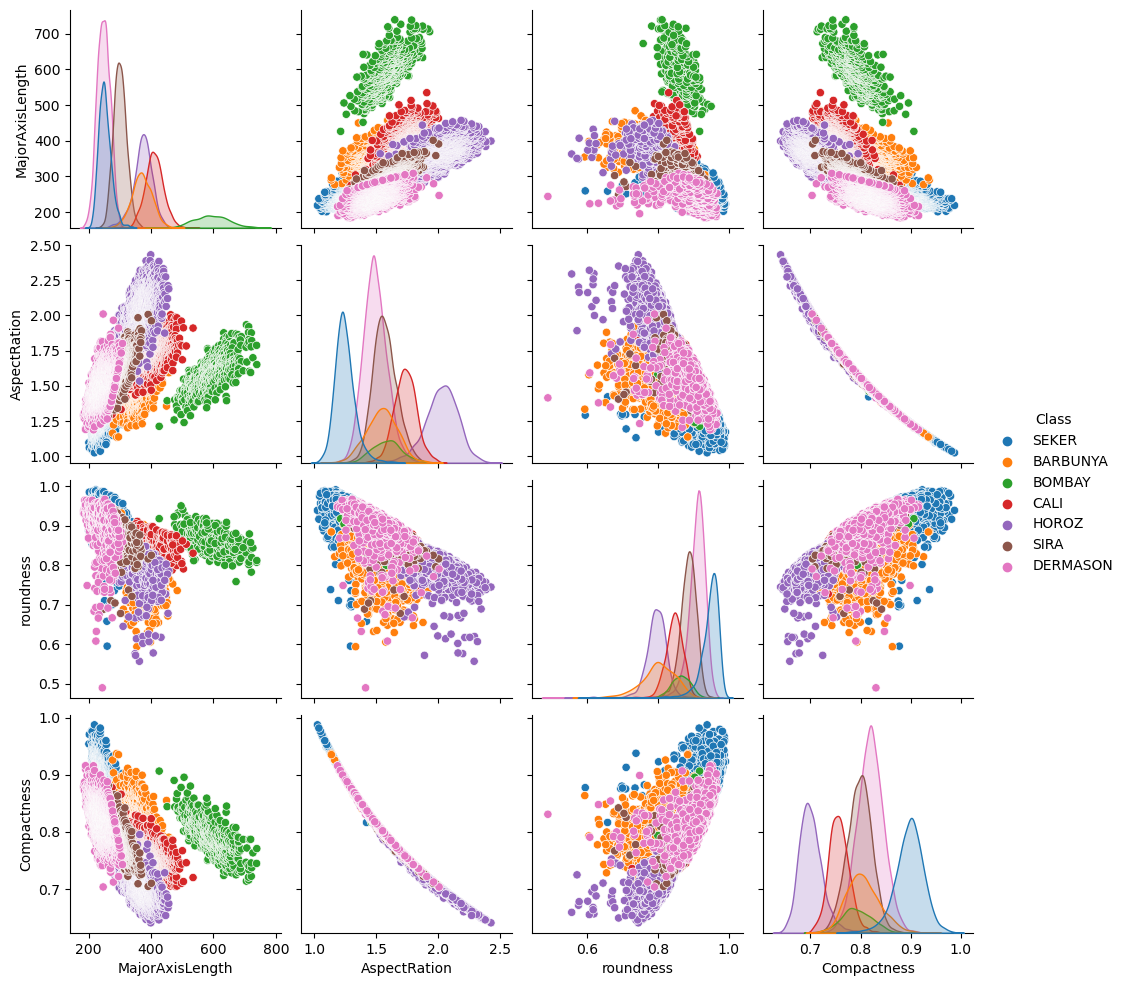

In [8]:
sns.pairplot(dataset[['MajorAxisLength', 'AspectRation', 'roundness', 'Compactness', 'Class']], hue="Class");


In [10]:
dataset.drop('Class', inplace=True, axis=1)

In [11]:
#Scaling data
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

In [12]:
%%time
# Hyperparameters tunning for DBSCAN: finding best model fitting this dataset using silhouette_score
eps_range = [0.5,0.6,0.7,0.8,0.9]
min_samples = range(3,6)
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = range(5,40,10)
dict_scoring = {'eps': -1000, 'min_samples': -1000, 'score': -1000}
for algo in algorithm:
    for ep in eps_range:
        for min_s in min_samples:
            for leaf in leaf_size:
                clustering = DBSCAN(eps=ep, min_samples=min_s, algorithm = algo, n_jobs=-1, metric='euclidean', leaf_size = leaf).fit(dataset_scaled)
                labels = clustering.labels_
                score = silhouette_score(dataset_scaled, labels)
                if score > dict_scoring['score']:
                    dict_scoring['algorithm'] = algo
                    dict_scoring['score'] = score
                    dict_scoring['eps'] = ep
                    dict_scoring['min_samples'] = min_s
                    dict_scoring['leaf_size'] = leaf
print(dict_scoring)

{'eps': 0.9, 'min_samples': 5, 'score': 0.14213351330375545, 'algorithm': 'auto', 'leaf_size': 5}
CPU times: user 35min 50s, sys: 7min 25s, total: 43min 15s
Wall time: 7min 41s


In [14]:
#Best model
best_fit_DBSCAN = DBSCAN(eps = dict_scoring['eps'],
                min_samples = dict_scoring['min_samples'],
                algorithm = dict_scoring['algorithm'],
                leaf_size = dict_scoring['leaf_size'],
                metric = 'euclidean',
                n_jobs = -1
               )
best_fit_DBSCAN.fit(dataset_scaled)

dataset['class'] = best_fit_DBSCAN.labels_

In [15]:
dataset['class'].unique()

array([ 0, -1,  1,  2,  3,  4,  5,  6])